### Keras 

https://keras.io/applications/#available-models

https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model


In [18]:
import numpy as np
import pickle, time, sys
from copy import deepcopy
from shutil import copy
import import_ipynb
from tqdm import tqdm_notebook as tqdm
import RMT_Util

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import powerlaw

import tensorflow as tf
import keras
from keras.callbacks import TensorBoard, EarlyStopping
from keras.optimizers import SGD
from keras.initializers import Constant
import keras.backend as K
from keras.models import load_model


from keras.applications import vgg16, vgg19, inception_resnet_v2, mobilenet, nasnet 

import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix


print(sys.version)
print("numpy version {}".format(np.__version__))
print("tensforflow version {}".format(tf.__version__))
print("keras version {}".format(keras.__version__))

3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.14.3
tensforflow version 1.10.1
keras version 2.2.2


In [19]:
#sess = tf.InteractiveSession()
#sess.run(tf.global_variables_initializer())

In [30]:
kmodel = vgg16.VGG16
#model = kmodel(weights=None)
model = kmodel(weights='imagenet')

In [31]:
!rm vgg16.h5
!ls *h5

ls: *h5: No such file or directory


In [32]:
model.save("vgg16.h5")

In [33]:
pmodel = load_model('vgg16.h5')

/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [34]:
for il, l in enumerate(pmodel.layers):
        print(il,l)

0 <keras.engine.input_layer.InputLayer object at 0x1a42262160>
1 <keras.layers.convolutional.Conv2D object at 0x1a422620f0>
2 <keras.layers.convolutional.Conv2D object at 0x1a42262da0>
3 <keras.layers.pooling.MaxPooling2D object at 0x1a422626d8>
4 <keras.layers.convolutional.Conv2D object at 0x1a42262b70>
5 <keras.layers.convolutional.Conv2D object at 0x1a42262dd8>
6 <keras.layers.pooling.MaxPooling2D object at 0x1a4220ef28>
7 <keras.layers.convolutional.Conv2D object at 0x1a4220eeb8>
8 <keras.layers.convolutional.Conv2D object at 0x1a4220ec88>
9 <keras.layers.convolutional.Conv2D object at 0x1a4220eb38>
10 <keras.layers.pooling.MaxPooling2D object at 0x1a4220e940>
11 <keras.layers.convolutional.Conv2D object at 0x1a4220e7f0>
12 <keras.layers.convolutional.Conv2D object at 0x1a4220e5c0>
13 <keras.layers.convolutional.Conv2D object at 0x1a4220e400>
14 <keras.layers.pooling.MaxPooling2D object at 0x1a4220e240>
15 <keras.layers.convolutional.Conv2D object at 0x1a4220e0b8>
16 <keras.layers

### Get weights from last l, should be power law

In [35]:
W = l.get_weights()[0]
W.shape

(4096, 1000)

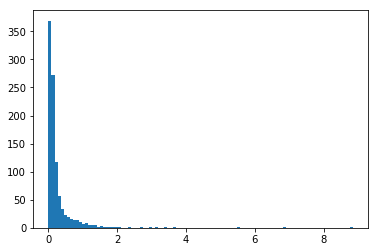

In [36]:
X = np.dot(W.T,W)
evals = np.linalg.eigvals(X)
plt.hist(evals, bins=100);